In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [10]:
def load_and_process_files(file_paths):
    # Create a dictionary to store the DataFrames
    dataframes = {}
    
    # Load each file into a DataFrame and calculate total accuracy for each metric
    for name, file_path in file_paths.items():
        df = pd.read_csv(file_path)
        # Calculate total accuracy for each metric
        total_accuracy = {
            'WER': df['WER'].mean(),
            'CER': df['CER'].mean(),
            'SER': df['SER'].mean(),
            'BLEU': df['BLEU'].mean(),
            'Levenshtein Distance': df['Levenshtein Distance'].mean(),
            'Cosine Similarity': df['Cosine Similarity'].mean()
        }
        dataframes[name] = total_accuracy
    
    return dataframes

In [11]:
def compare_accuracy(dataframes):
    # Create a DataFrame to compare the accuracy metrics
    comparison_df = pd.DataFrame(dataframes).T
    comparison_df.index.name = 'Speaker'
    return comparison_df

In [12]:
# List of CSV files
file_paths  = {
    'Madelyn':'data_whisper/Madelyn_base.csv',
    'Michael':'data_whisper/Michael_base.csv',
    'Nava':'data_whisper/Nava_base.csv',
    'Oliver':'data_whisper/Oliver_base.csv'
}


In [13]:
dataframes = load_and_process_files(file_paths)

In [14]:
comparison_df = compare_accuracy(dataframes)


In [15]:
def plot_comparison(comparison_df):
    comparison_df.plot(kind='bar', figsize=(12, 6))
    plt.title('Comparison of Accuracy Metrics for Each Speaker')
    plt.xlabel('Speaker')
    plt.ylabel('Mean Accuracy')
    plt.xticks(rotation=45)
    plt.legend(title='Metrics', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

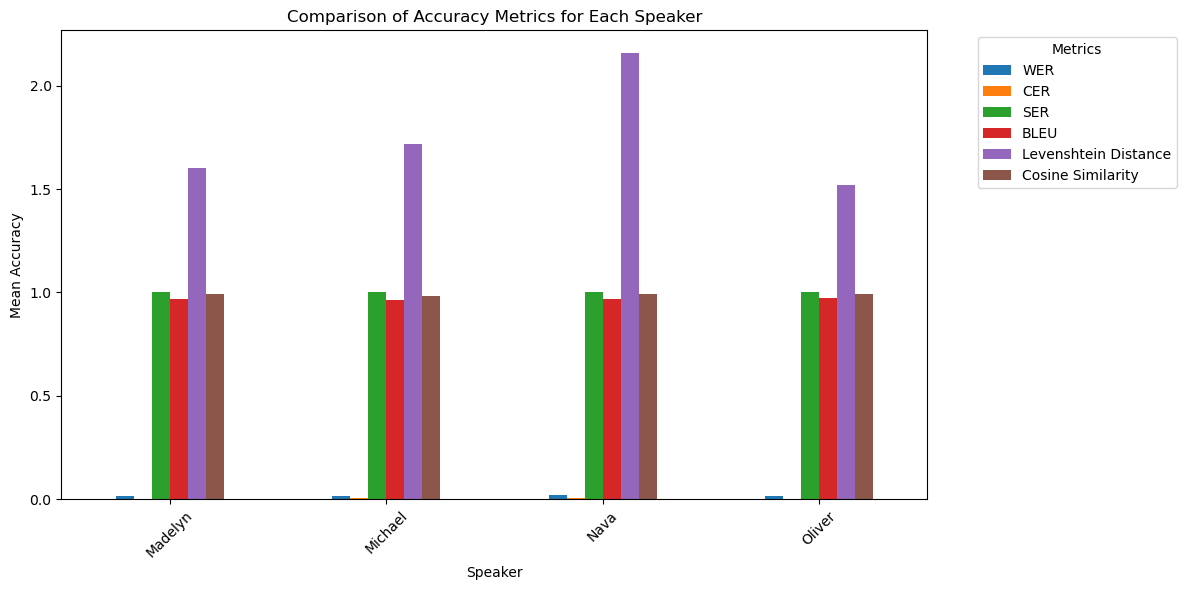

In [16]:
plot_comparison(comparison_df)

In [17]:
def plot_individual_comparisons(comparison_df):
    metrics = comparison_df.columns
    num_metrics = len(metrics)
    
    fig, axes = plt.subplots(num_metrics, 1, figsize=(10, 5 * num_metrics), sharex=True)
    
    # If there's only one metric, axes will not be an array, so we need to handle that case
    if num_metrics == 1:
        axes = [axes]

    for i, metric in enumerate(metrics):
        axes[i].bar(comparison_df.index, comparison_df[metric], color=['blue', 'orange', 'green', 'red'])
        axes[i].set_title(f'Comparison of {metric} Across Speakers')
        axes[i].set_ylabel(metric)
        axes[i].set_ylim(0, comparison_df[metric].max() + 0.1)  # Adjust y-axis limits

        # Annotate values on top of each bar
        for p in axes[i].patches:
            axes[i].annotate(f'{p.get_height():.2f}', 
                             (p.get_x() + p.get_width() / 2., p.get_height()), 
                             ha='center', va='baseline', 
                             fontsize=10, color='black', xytext=(0, 5),
                             textcoords='offset points')

    plt.xlabel('Speakers')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

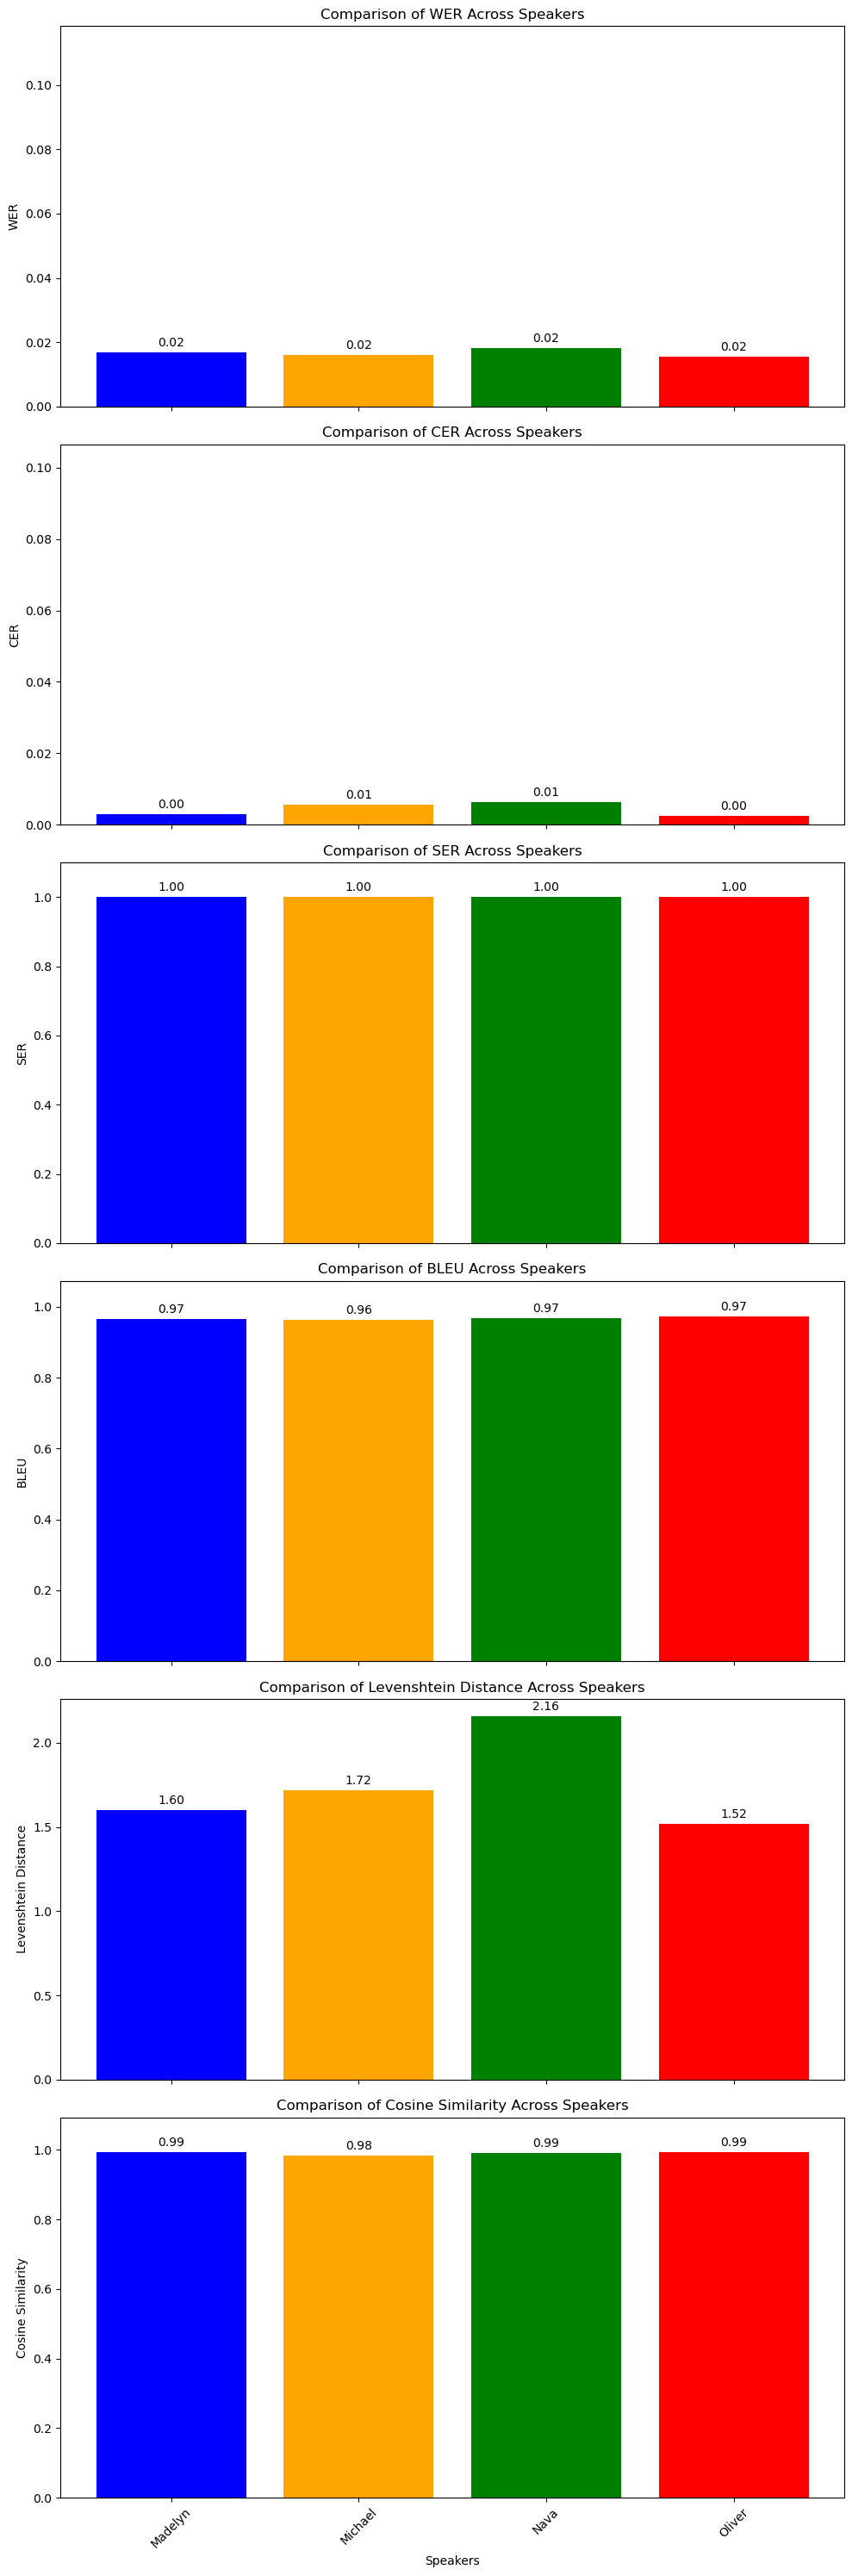

In [18]:
plot_individual_comparisons(comparison_df)

In [19]:
def compare_transcription_times(file_path):
    # Load the CSV file into a DataFrame
    df = pd.read_csv(file_path)
    
    # Assuming 'Transcription Time' is the column name for transcription times
    transcription_times = df['Transcription Time']
    
    # Calculate the average transcription time for each subset
    subset_sizes = [10, 20, 30, 40, 50]
    averages = []
    
    for size in subset_sizes:
        avg_time = transcription_times[:size].mean()
        averages.append(avg_time)
    
    # Calculate the overall average transcription time
    overall_avg = transcription_times.mean()
    
    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.bar([f'First {size}' for size in subset_sizes], averages, color='skyblue', label='Subset Averages')
    plt.axhline(overall_avg, color='red', linestyle='--', label=f'Overall Average: {overall_avg:.2f}')
    
    # Add values on top of each bar
    for i, avg in enumerate(averages):
        plt.text(i, avg + 0.05, f'{avg:.2f}', ha='center', fontsize=12)
    
    plt.title('Comparison of Transcription Times for Different Subsets')
    plt.xlabel('Subset Size')
    plt.ylabel('Average Transcription Time (seconds)')
    plt.legend()
    plt.tight_layout()
    plt.show()

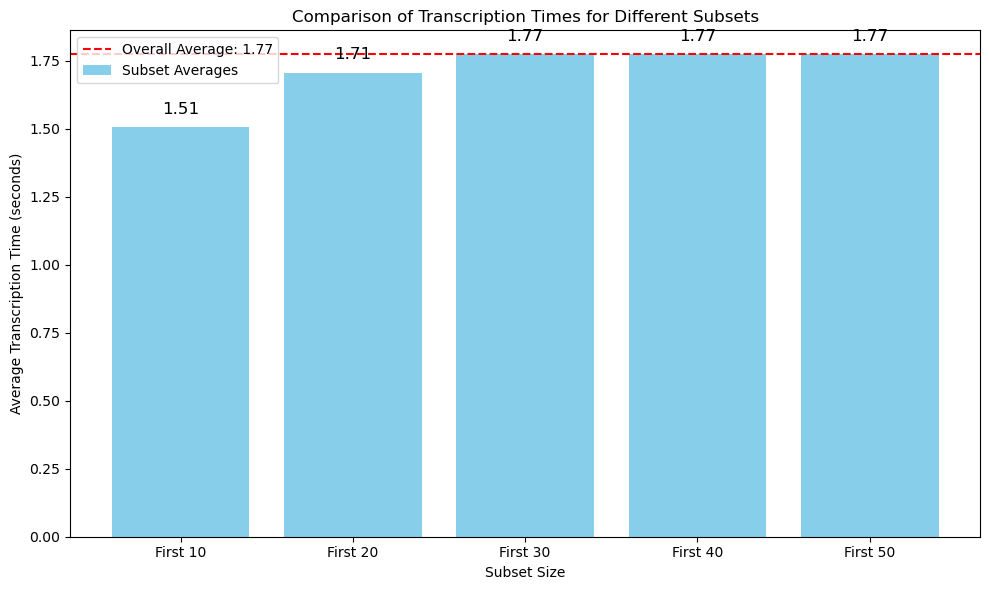

In [20]:
compare_transcription_times('data_whisper/Madelyn_base.csv')